In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
from sklearn.datasets import load_digits

mnist = load_digits()

In [3]:
X = mnist["data"]

print(X.shape)
X

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
y = mnist["target"]

print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

## Preprocessing

In [6]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y_hot.shape)
y_hot

(1797, 10)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Activate Function

### Sigmoid

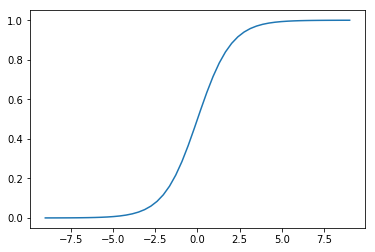

In [7]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=9)
yy = sigmoid(xx)

plt.plot(xx, yy)

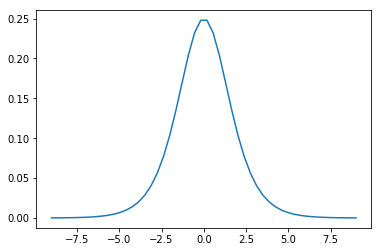

In [8]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9, stop=9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

## ReLU

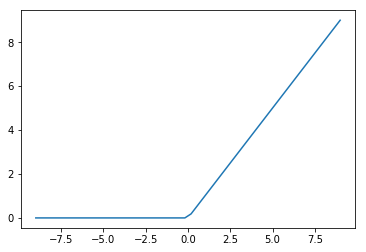

In [26]:
def relu(n):
    return n * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu(xx)

plt.plot(xx, yy)

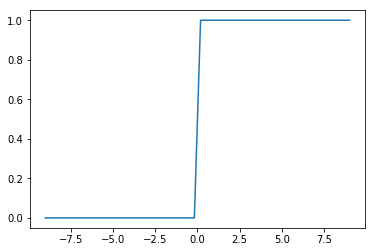

In [27]:
def relu_derivative(n):
    return 1 * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu_derivative(xx)

plt.plot(xx, yy)

## Benchmark

In [28]:
%time tmp = [sigmoid(i) for i in range(1000000)]
%time tmp = [sigmoid_derivative(i) for i in range(1000000)]

CPU times: user 1.68 s, sys: 20.5 ms, total: 1.7 s
Wall time: 1.71 s
CPU times: user 3.69 s, sys: 25.6 ms, total: 3.72 s
Wall time: 3.72 s


In [29]:
%time tmp = [relu(i) for i in range(1000000)]
%time tmp = [relu_derivative(i) for i in range(1000000)]

CPU times: user 170 ms, sys: 20.7 ms, total: 190 ms
Wall time: 193 ms
CPU times: user 147 ms, sys: 9.93 ms, total: 157 ms
Wall time: 160 ms


## Train

In [30]:
import time

def train(X, y, y_hot, num_epoch, learning_rate, activation, activation_derivative):
    num_input = X.shape[1]
    num_output = y_hot.shape[1]
    
    w1 = np.random.uniform(low=-np.sqrt(6 / (num_input + 100)), high=np.sqrt(6 / (num_input + 100)), size=(num_input, 100))
    w2 = np.random.uniform(low=-np.sqrt(6 / (100 + 100)), high=np.sqrt(6 / (100 + 100)), size=(100, 100))
    w3 = np.random.uniform(low=-np.sqrt(6 / (100 + num_output)), high=np.sqrt(6 / (100 + 10)), size=(100, num_output))
    
    history = []
    
    start = time.time()
    
    for epoch in range(num_epoch):
        # forward propagation
        z1 = X.dot(w1)
        a1 = activation(z1)
        z2 = a1.dot(w2)
        a2 = activation(z2)
        z3 = a2.dot(w3)
        a3 = sigmoid(z3)
        
        y_predict = np.argmax(a3, axis=1)
        error = (y != y_predict).mean()
        
        if epoch % 10 == 0:
            print("{:2} error = {:.5f}".format(epoch, error))
            
        end = time.time()
        history.append({
            'time': end - start,
            'error': error
        })
        
        # backward propagation
        d3 = a3 - y_hot
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)
        
        w3 = w3 - learning_rate * a2.T.dot(d3)
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)
        
    end = time.time()
    elapsed = end - start
    
    return history, error, elapsed

### Sigmoid

In [31]:
num_epoch = 100
learning_rate = 0.0003

sigmoid_history, error, elapsed = train(X, y, y_hot, num_epoch, learning_rate,
                                       activation=sigmoid,
                                       activation_derivative=sigmoid_derivative)

print("---" * 10)
print("[sigmoid] Elapsed {:.2f} second, error = {:.5f}".format(elapsed, error))

 0 error = 0.90317
10 error = 0.35058
20 error = 0.25487
30 error = 0.21758
40 error = 0.21647
50 error = 0.21035
60 error = 0.18086
70 error = 0.16694
80 error = 0.15582
90 error = 0.14969
------------------------------
[sigmoid] Elapsed 1.59 second, error = 0.14524


### ReLU

In [33]:
num_epoch = 100
learning_rate = 0.00001

relu_history, error, elapsed = train(X, y, y_hot, num_epoch, learning_rate,
                                       activation=relu,
                                       activation_derivative=relu_derivative)

print("---" * 10)
print("[relu] Elapsed {:.2f} second, error = {:.5f}".format(elapsed, error))

 0 error = 0.82193
10 error = 0.22871
20 error = 0.13189
30 error = 0.08625
40 error = 0.06344
50 error = 0.05342
60 error = 0.04953
70 error = 0.04452
80 error = 0.03617
90 error = 0.03450
------------------------------
[relu] Elapsed 0.77 second, error = 0.02949


## Visualize

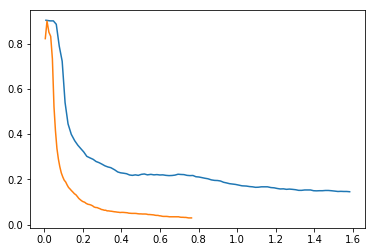

In [34]:
import pandas as pd

sigmoid_history = pd.DataFrame(sigmoid_history)
relu_history = pd.DataFrame(relu_history)

plt.plot(sigmoid_history['time'], sigmoid_history['error'], label='sigmoid')
plt.plot(relu_history['time'], relu_history['error'], label='relu')